Importamos las librerias como tambien damos una semilla para que se generen los numeros randon y a estatura le generamos 100 estatruras con un rango de valores como ser 1.5, maximo de 2.1 y 100 valores y creamos una lista para los pesos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
estaturas = np.random.uniform(1.5, 2.1, 100)
pesos = []

Por cada estatura de la lista estatura vamos sacando los valores y sacamos un peso minimo y maximo con el IMC de una persona normal, y con esos valores sacamos el peso con un numero randon que tendra como minimo el peso minimo y maximo el peso maximo y ese peso se le pone a la lista peso

In [ ]:
for estatura in estaturas:
   peso_min = 18.5 * (estatura ** 2)
   peso_max = 24.9 * (estatura ** 2)
   desviacion = (peso_max - peso_min) * 0.1
   peso = np.random.normal(loc=(peso_min + peso_max) / 2, scale=desviacion)
   peso = np.clip(peso, peso_min, peso_max)
   pesos.append(peso)

Guardamos en un dataframe las Estaturas y los pesos calculados y lo imprimimos

In [ ]:
dataEstatura = pd.DataFrame({
    'Estatura': estaturas,
    'Peso': pesos
})
#imprimimos los pesos y estaturas
print(dataEstatura)

    Estatura       Peso
0   2.073388  96.575715
1   1.770656  67.322761
2   1.663003  59.799940
3   1.972670  83.323915
4   2.074815  96.275385
..       ...        ...
95  1.544443  54.354883
96  1.505533  49.534753
97  1.596437  55.200929
98  1.904047  79.869533
99  1.676572  62.450096

[100 rows x 2 columns]


Con este codigo indicamos que con los datos del dataframe de la columna Estatura (m) y Peso (Kg) sacamos donde estarian en una grafica, donde asignamos el nombre a la tabla como Estatura vs Peso Original, y le damos los valores de x a Estatura y y para Peso y mostramos la grafica

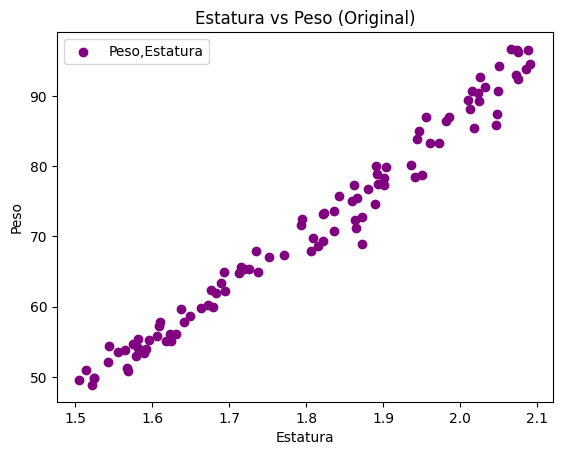

In [ ]:
plt.scatter(dataEstatura['Estatura'], dataEstatura['Peso'], color='purple', label='Peso,Estatura')
plt.title('Estatura vs Peso (Original)')
plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.legend()
plt.show()

En este caso transformamos los datos en el caso de Estatura de combierte en una matriz con una columna para su mejor procesamiento y el caso de peso no se toca ya que solo se convierte en una array porque es la etiqueta o el valor que se quiere predecir, imprimimos solo 10 para demostracion, todo esto se usara para ajustar una curva polinomica de grado 2

El modelo de curva toma como el peso como no constante respecto a la estatura y con el peso puede aumentar con cierta estatura

In [ ]:
XO = dataEstatura['Estatura'].values.reshape(-1, 1)
y = dataEstatura['Peso'].values
print(XO[:10])


[[2.07338849]
 [1.77065633]
 [1.66300308]
 [1.97266968]
 [2.07481522]
 [1.9812007 ]
 [1.81590161]
 [1.83620228]
 [1.57457428]
 [1.51444266]]


Se crea un objeto de de transformacion polinomica y se pone de que grado en este caso de grado 2 que se pone los terminos normales y cuadraticos.
En el poly.fit_transform(X), fit en este caso no hace nada ya que los terminos lineas ya estan bien si no esto se encargaria, y el transform genera una matriz con los terminos polinomicos adicionales, como el termino cuadratico que es la estaura elevado a 2 y el sesgo que son los 1

In [ ]:
Curvapoly = PolynomialFeatures(degree=2)
XO_poly = Curvapoly.fit_transform(XO)
print(XO_poly[:10])

[[1.         2.07338849 4.29893983]
 [1.         1.77065633 3.13522383]
 [1.         1.66300308 2.76557923]
 [1.         1.97266968 3.89142567]
 [1.         2.07481522 4.3048582 ]
 [1.         1.9812007  3.92515622]
 [1.         1.81590161 3.29749868]
 [1.         1.83620228 3.37163882]
 [1.         1.57457428 2.47928417]
 [1.         1.51444266 2.29353658]]


Crea el modelo de regresion lineal en este caso una parabola, luego se lo entrena con los valores de x_poly y los valores del vector y, ajusta el modelo a los datos buscando los sesgo o intercepto con el pendiente que es la variable objetivo y

In [ ]:
CurvaModelo = LinearRegression()
CurvaModelo.fit(XO_poly, y)


LinearRegression()

Al tener el modelo entrenado pues mejora la capacidad de predecir y tiene una mejora en la parabola

Una vez entrenado intenta predecir las variables de peso para la x_poly que tenia altura, despues calcula el error cuadratico medio que es la precision del modelo donde y son los valores dependientes que estan fijas y y_pred es lo que el modelo saco, entonces mse que es el error cuadratico medio que representa el promedio de los cuadrados de las diferencias entre y y y_pred

In [ ]:
Y_Entrenado = CurvaModelo.predict(XO_poly)
mse = mean_squared_error(y, Y_Entrenado)
print(f"Error cuadrático medio es de  (MSE): {mse:.2f}")

Error cuadrático medio es de  (MSE): 4.11


Imprimimos los puntos originale, luego creamos la curva o parabola con los valores x y los valores calculados a todo se le pone label para su interpretacion del legend

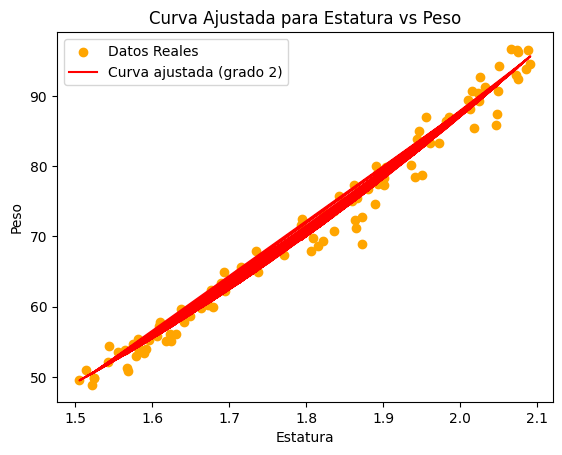

In [ ]:
plt.scatter(dataEstatura['Estatura'], dataEstatura['Peso'], color='orange', label='Datos Reales')
plt.plot(dataEstatura['Estatura'], Y_Entrenado, color='red', label='Curva ajustada (grado 2)')
plt.title('Curva Ajustada para Estatura vs Peso')
plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.legend()
plt.show()